# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [8]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [9]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_raw['Latitude Group'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Below -10.5', 'Above or Equal -10.5'])

aggregated_results = sinasc_raw.groupby('Latitude Group').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
aggregated_results

/tmp/ipykernel_34958/3357233672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_results = sinasc_raw.groupby('Latitude Group').agg({


PESO                                              \
                           sum         mean  min   max  median         std   
Latitude Group                                                               
Below -10.5           42098594  3240.098053  258  5985  3270.0  531.815114   
Above or Equal -10.5  45555148  3246.055864  295  5190  3275.0  556.487709   

                                     IDADEPAI                                \
                                var       sum       mean   min   max median   
Latitude Group                                                                
Below -10.5           282827.315354  198460.0  30.903145  15.0  86.0   30.0   
Above or Equal -10.5  309678.570242   38038.0  32.126689  16.0  73.0   31.0   

                                           
                           std        var  
Latitude Group                             
Below -10.5           7.707002  59.397875  
Above or Equal -10.5  8.034214  64.548602

In [11]:
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] >= -10.5, '>= -10.5', '< -10.5')

aggregated_results = sinasc_raw.groupby('faixa_latitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

aggregated_results

PESO                                              \
                     sum         mean  min   max  median         std   
faixa_latitude                                                         
< -10.5         42101809  3240.096121  258  5985  3270.0  531.794694   
>= -10.5        45555148  3246.055864  295  5190  3275.0  556.487709   

                                 APGAR1                                        \
                          var       sum      mean  min   max median       std   
faixa_latitude                                                                  
< -10.5         282805.596163  104599.0  8.070288  0.0  10.0    8.0  0.960765   
>= -10.5        309678.570242  114559.0  8.199771  0.0  10.0    8.0  1.002839   

                          
                     var  
faixa_latitude            
< -10.5         0.923069  
>= -10.5        1.005686

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
tab2 = pd.cut(sinasc_raw['munResArea'],[sinasc_raw['munResArea'].min()-1,3000,sinasc_raw['munResArea'].max()+1])

In [13]:
sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),
                                                            ('Média','mean'),
                                                            ('Mínimo','min'),
                                                            ('Máximo','max'),
                                                            ('Mediana','median'),
                                                            ('Desvio Padrão','std'),
                                                            ('Variância','var')])


/tmp/ipykernel_34958/114362923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),


QTDFILVIVO                                                \
                          Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                                     
(458.978, 3000.0]       4773.0  0.924284    0.0   30.0     1.0      1.075442   
(3000.0, 34097.394]    22053.0  1.086890    0.0   14.0     1.0      1.191750   

                              QTDFILMORT                                  \
                    Variância       Soma     Média Mínimo Máximo Mediana   
munResArea                                                                 
(458.978, 3000.0]    1.156575     1260.0  0.244803    0.0    4.0     0.0   
(3000.0, 34097.394]  1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                             
                    Desvio Padrão Variância  
munResArea                                   
(458.978, 3000.0]        0.551215  0.303838  
(3000.0, 34097.394]      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
idade_mae = pd.cut(sinasc_raw['munResAlt'], 5)
sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
                       index=['ESCMAE', idade_mae],
                       aggfunc={
                           'PESO': ['mean', 'median'],
                           'IDADEPAI': [('maximo',np.max), ('minimo', np.min)]
                       },
                       dropna=True)


/tmp/ipykernel_34958/1554764931.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
/tmp/ipykernel_34958/1554764931.py:2: FutureWarning: The provided callable <function max at 0x7957dc49bc40> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
/tmp/ipykernel_34958/1554764931.py:2: FutureWarning: The provided callable <function min at 0x7957dc49bd80> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],


IDADEPAI                PESO        
                                 maximo minimo         mean  median
ESCMAE          munResAlt                                          
1 a 3 anos      (84.49, 187.0]     60.0   18.0  3164.506944  3227.5
                (187.0, 289.0]     55.0   21.0  3167.235294  3290.0
                (289.0, 391.0]     41.0   17.0  3286.166667  3295.0
                (391.0, 493.0]     38.0   23.0  3102.000000  3170.0
                (493.0, 595.0]      NaN    NaN  2846.900000  3050.0
12 anos ou mais (84.49, 187.0]     65.0   17.0  3260.066379  3285.0
                (187.0, 289.0]     60.0   18.0  3208.946331  3230.0
                (289.0, 391.0]     58.0   19.0  3237.820513  3292.0
                (391.0, 493.0]     44.0   21.0  3278.344086  3300.0
                (493.0, 595.0]     60.0   18.0  3207.607219  3270.0
4 a 7 anos      (84.49, 187.0]     73.0   16.0  3238.246524  3275.0
                (187.0, 289.0]     86.0   16.0  3173.756131  3232.5
                (289.0, 391.0]     47.0   18.0  3286.981308  3384.0
                (391.0, 493.0]     47.0   18.0  3212.245614  3195.0
                (493.0, 595.0]     23.0   23.0  3137.688525  3240.0
8 a 11 anos     (84.49, 187.0]     70.0   15.0  3256.105529  3275.0
                (187.0, 289.0]     69.0   16.0  3225.353300  3255.0
                (289.0, 391.0]     61.0   17.0  3244.339564  3260.0
                (391.0, 493.0]     53.0   16.0  3244.593301  3310.0
                (493.0, 595.0]     47.0   24.0  3256.625384  3280.0
Nenhuma         (84.49, 187.0]     52.0   29.0  3209.166667  3135.0
                (187.0, 289.0]     43.0   30.0  2577.428571  2905.0
                (289.0, 391.0]      NaN    NaN  2255.000000  2255.0
                (493.0, 595.0]      NaN    NaN  3425.000000  3425.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [15]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}
imediatas

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Ariquemes': 'Ariquemes',
 'Alto Paraíso': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Jaru': 'Jaru',
 'Governador Jorge Teixeira': 'Jaru',
 "Machadinho D'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 'Cacoal': 'Cacoal',
 "Alta Floresta D'Oe

<Axes: xlabel='imediatas', ylabel='idade_mãe'>

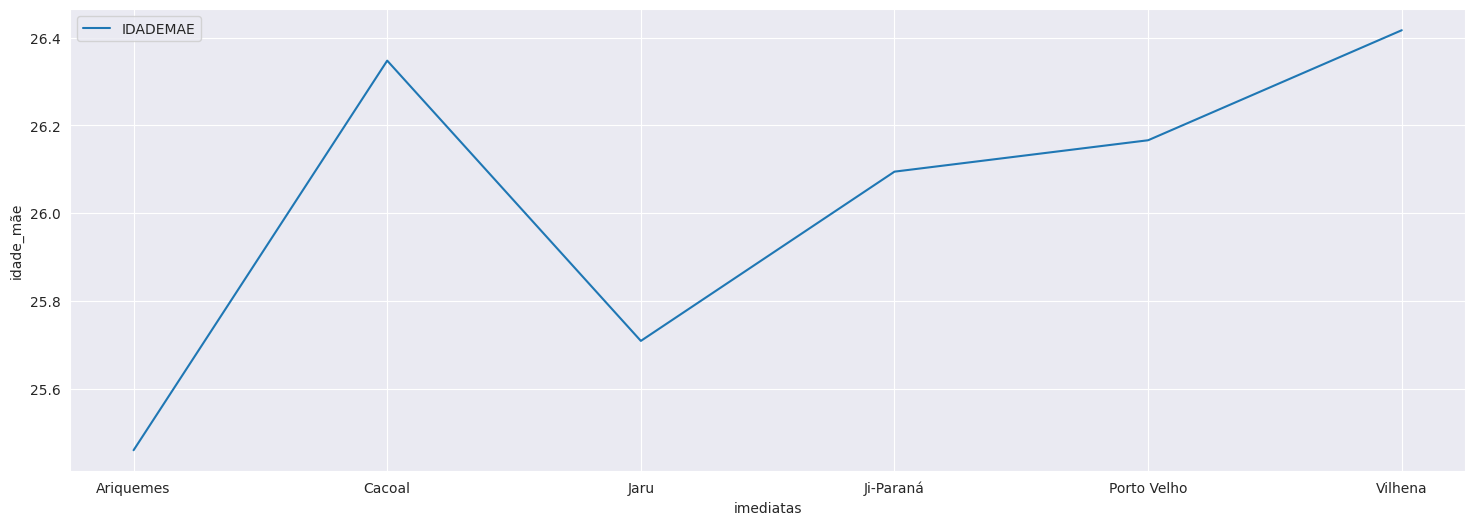

In [16]:
imediatas_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

/tmp/ipykernel_34958/1465370998.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, "Alta Floresta D'Oeste"),
 Text(1, 0, 'Alto Alegre dos Parecis'),
 Text(2, 0, 'Novo Horizonte do Oeste'),
 Text(3, 0, 'Rolim de Moura'),
 Text(4, 0, "São Felipe D'Oeste"),
 Text(5, 0, 'Ariquemes'),
 Text(6, 0, 'Cujubim'),
 Text(7, 0, 'Alto Paraíso'),
 Text(8, 0, 'Monte Negro'),
 Text(9, 0, 'Jaru'),
 Text(10, 0, 'Rio Crespo'),
 Text(11, 0, 'Porto Velho'),
 Text(12, 0, 'Cacaulândia'),
 Text(13, 0, 'Itapuã do Oeste'),
 Text(14, 0, 'Ji-Paraná'),
 Text(15, 0, 'Buritis'),
 Text(16, 0, 'Vilhena'),
 Text(17, 0, 'Vale do Anari'),
 Text(18, 0, 'Candeias do Jamari'),
 Text(19, 0, 'Costa Marques'),
 Text(20, 0, 'Campo Novo de Rondônia'),
 Text(21, 0, "Machadinho D'Oeste"),
 Text(22, 0, 'Colorado do Oeste'),
 Text(23, 0, 'Nova Mamoré'),
 Text(24, 0, 'Urupá'),
 Text(25, 0, 'Ouro Preto do Oeste'),
 Text(26, 0, 'Corumbiara'),
 Text(27, 0, 'São Miguel do Guaporé'),
 Text(28, 0, 'Governador Jorge Teixeira'),
 Text(29, 0, "Santa Luzia D'Oeste"),
 Text(30, 0, 'Pimenta Bueno'),
 Text(31, 0, 'Mi

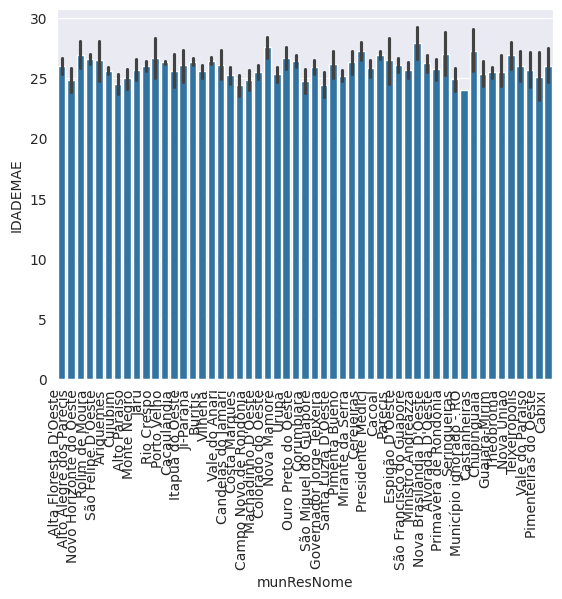

In [17]:
municipio = sns.barplot(x='munResNome', y='IDADEMAE', data=sinasc_raw)
municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')

/tmp/ipykernel_34958/2755432933.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipio2.set_xticklabels(municipio2.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, "Alta Floresta D'Oeste"),
 Text(1, 0, 'Alto Alegre dos Parecis'),
 Text(2, 0, 'Novo Horizonte do Oeste'),
 Text(3, 0, 'Rolim de Moura'),
 Text(4, 0, "São Felipe D'Oeste"),
 Text(5, 0, 'Ariquemes'),
 Text(6, 0, 'Cujubim'),
 Text(7, 0, 'Alto Paraíso'),
 Text(8, 0, 'Monte Negro'),
 Text(9, 0, 'Jaru'),
 Text(10, 0, 'Rio Crespo'),
 Text(11, 0, 'Porto Velho'),
 Text(12, 0, 'Cacaulândia'),
 Text(13, 0, 'Itapuã do Oeste'),
 Text(14, 0, 'Ji-Paraná'),
 Text(15, 0, 'Buritis'),
 Text(16, 0, 'Vilhena'),
 Text(17, 0, 'Vale do Anari'),
 Text(18, 0, 'Candeias do Jamari'),
 Text(19, 0, 'Costa Marques'),
 Text(20, 0, 'Campo Novo de Rondônia'),
 Text(21, 0, "Machadinho D'Oeste"),
 Text(22, 0, 'Colorado do Oeste'),
 Text(23, 0, 'Nova Mamoré'),
 Text(24, 0, 'Urupá'),
 Text(25, 0, 'Ouro Preto do Oeste'),
 Text(26, 0, 'Corumbiara'),
 Text(27, 0, 'São Miguel do Guaporé'),
 Text(28, 0, 'Governador Jorge Teixeira'),
 Text(29, 0, "Santa Luzia D'Oeste"),
 Text(30, 0, 'Pimenta Bueno'),
 Text(31, 0, 'Mi

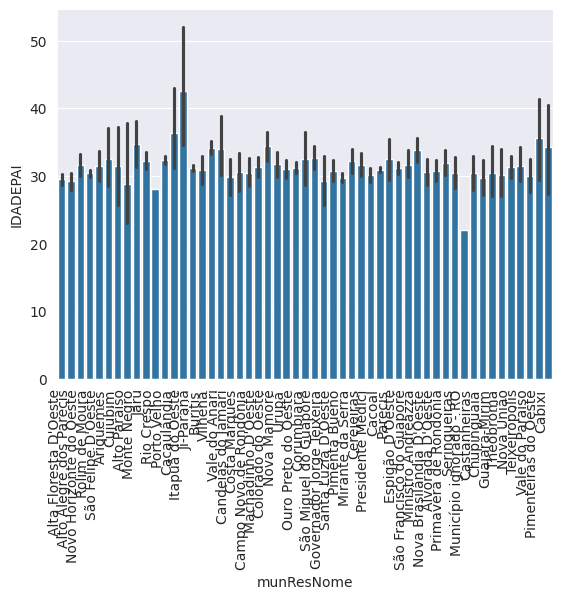

In [18]:
municipio2 = sns.barplot(x='munResNome', y='IDADEPAI', data=sinasc_raw)
municipio2.set_xticklabels(municipio2.get_xticklabels(), rotation=90, horizontalalignment='right')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio',
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio',
    'Rolim de Moura': 'IDH-alto',
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto',
    'Cujubim': 'IDH-médio',
    'Alto Paraíso': 'IDH-médio',
    'Monte Negro': 'IDH-médio',
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio',
    'Porto Velho': 'IDH-alto',
    'Cacaulândia': 'IDH-médio',
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto',
    'Buritis': 'IDH-médio',
    'Vilhena':'IDH-alto',
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio',
    'Costa Marques':'IDH-médio',
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo',
    'Colorado do Oeste': 'IDH-médio',
    'Nova Mamoré': 'IDH-baixo',
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio',
    'Corumbiara':'IDH-médio',
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo',
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto',
    'Mirante da Serra':'IDH-médio',
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio',
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio',
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio',
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio',
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio',
    'Chupinguaia':'IDH-médio',
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo',
    'Teixeirópolis':'IDH-médio',
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'
}

In [21]:
idh = sinasc_raw.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
IDH-alto    26.280332   26.0  6.415374  31.074091   30.0  7.773149
IDH-baixo   25.326944   25.0  6.194908  30.617450   30.0  7.417345
IDH-médio   25.884855   25.0  6.353274  31.207092   30.0  7.824859

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',

}

In [24]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


In [25]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,179957.0,31.145206,15.0,70.0,30.0,7.741017,59.923346
des_regular,25327.0,31.345297,16.0,73.0,30.0,7.975385,63.606768


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [26]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [27]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,465846,26.265562,12,47,26.0,6.403777,41.008357
Acima de 100 Milhões,47508,25.638424,12,52,25.0,6.324801,40.003102
Acima de 200 Milhões,13051,25.146435,13,41,25.0,5.905771,34.878129
Acima de 300 Milhões,32184,25.706070,11,47,25.0,6.344987,40.258860
Acima de 500 Milhões,86486,25.785927,13,53,25.0,6.479551,41.984580
Até 100 Milhões,9998,26.519894,14,41,26.0,5.877767,34.548140


In [28]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,144654.0,31.108387,15.0,70.0,30.0,7.767477,60.333700
Acima de 100 Milhões,18253.0,31.744348,17.0,73.0,31.0,8.008643,64.138361
Acima de 200 Milhões,5796.0,30.187500,16.0,55.0,29.0,7.659388,58.666230
Acima de 300 Milhões,8691.0,30.819149,16.0,64.0,30.0,7.858123,61.750095
Acima de 500 Milhões,20869.0,31.381955,17.0,60.0,31.0,7.583172,57.504493
Até 100 Milhões,7021.0,31.626126,17.0,67.0,30.0,7.665510,58.760038
